In [62]:
import pandas as pd
df_subway = pd.read_pickle('data/전년유동감소폭.pickle')

In [63]:
df_subway.head()

,date,호선,역번호,역명,구분,5-6,6-7,7-8,8-9,9-10,...,18-19,19-20,20-21,21-22,22-23,23-24,24-01,합 계,요일,공휴일
0,2019-01-01,1호선,150,서울,승차,348,321,348,741,940,...,3277,2898,2590,3004,2234,970,38,39559,화요일,0
1,2019-01-01,6호선,2630,녹사평(용산구청),승차,171,117,58,81,104,...,272,212,238,239,188,72,0,3506,화요일,0
2,2019-01-01,6호선,2629,삼각지,하차,46,89,64,80,105,...,128,152,157,116,152,80,14,2411,화요일,0
3,2019-01-01,6호선,2629,삼각지,승차,48,68,51,80,110,...,269,150,125,100,74,50,0,2981,화요일,0
4,2019-01-01,6호선,2628,효창공원앞,하차,24,76,64,103,129,...,213,179,149,163,145,80,12,2533,화요일,0


In [13]:
df_subway['year'] = df_subway['date'].dt.year
df_subway['month'] = df_subway['date'].dt.month
df_subway = df_subway.query('month == 5 and 구분 == "하차"')[['역명','year','합 계']].groupby(['역명','year']).sum().unstack()
df_subway.columns = df_subway.columns.droplevel([0])
df_subway['변화량(%)'] = (df_subway[2020]-df_subway[2019])/df_subway[2019]*100
df_subway.sort_values(by=['변화량(%)'])[['변화량(%)']][:20]

year,변화량(%)
역명,
종합운동장,-67.539233
명동,-64.614933
이태원,-61.678766
한양대,-60.508550
동대입구,-57.835741
이대,-57.803681
어린이대공원(세종대),-53.232246
학여울,-53.069603
홍대입구,-51.414876


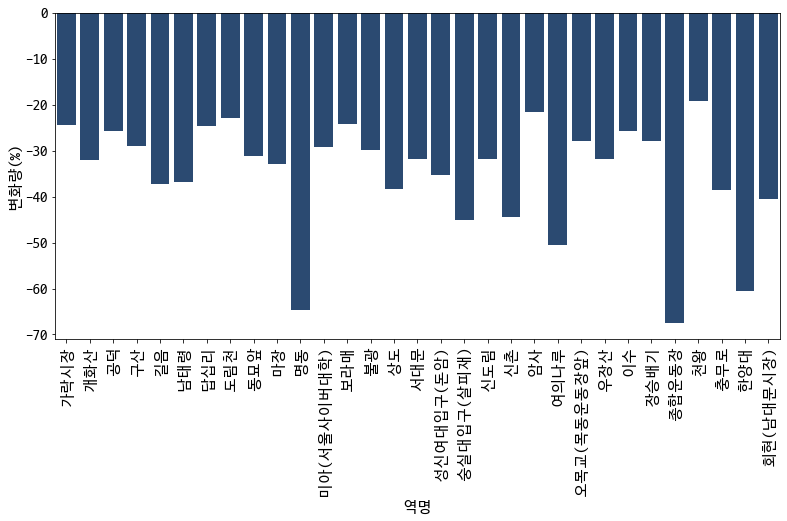

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(13,6))
plt.xticks(rotation=90)
plt.rcParams.update({'font.size': 15})
sns.barplot(x="역명", y="변화량(%)", data=df_subway.reset_index()[::8], color = '#1F497D')

%%상권에 대한 얘기

In [37]:
import re
df_sang_1 = pd.read_csv('data/상권정보/20-1분기상가업소정보_서울_202003 - 복사본.csv', encoding='ANSI')
df_sang_1[['법정동명','상호명']].groupby(['법정동명']).count()

,상호명
법정동명,
가락동,2072
가리봉동,663
가산동,3476
가양동,1225
가회동,114
...,...
후암동,346
훈정동,3
휘경동,1329


In [38]:
df_sang_2 = pd.read_csv('data/상권정보/20-2분기상가(상권)정보_서울_20200630.csv', delimiter='|',encoding='utf-8')
df_sang_2[['법정동명','상호명']].groupby(['법정동명']).count()

,상호명
법정동명,
가락동,2005
가리봉동,635
가산동,3292
가양동,1097
가회동,109
...,...
후암동,327
훈정동,4
휘경동,1189


In [39]:
df_qu = pd.DataFrame(columns=['1분기','2분기'])

In [40]:
df_qu['1분기'] = df_sang_1[['법정동명','상호명']].groupby(['법정동명']).count()['상호명']
df_qu['2분기'] = df_sang_2[['법정동명','상호명']].groupby(['법정동명']).count()['상호명']

In [41]:
df_qu['변화량'] = (df_qu['2분기'] - df_qu['1분기'])/df_qu['1분기']*100

In [42]:
df_qu.sum()

1분기    391500.000000
2분기    370321.000000
변화량     -1744.580447
dtype: float64

In [43]:
#이상치제거위해 상위 하위 10개 버림
df_qu.sort_values(by=['변화량'])[10:-10].mean()

1분기    853.130045
2분기    809.008969
변화량     -3.905912
dtype: float64

In [44]:
df_qu.index

Index(['가락동', '가리봉동', '가산동', '가양동', '가회동', '갈월동', '갈현동', '강일동', '개봉동', '개포동',
       ...
       '회현동2가', '회현동3가', '효자동', '효제동', '효창동', '후암동', '훈정동', '휘경동', '흑석동',
       '흥인동'],
      dtype='object', name='법정동명', length=466)

In [45]:
df_g = df_qu.query('법정동명 in ["잠실동", "충무로2가","이태원동","행당동","장충동2가", "대현동", "군자동","대치동"]')

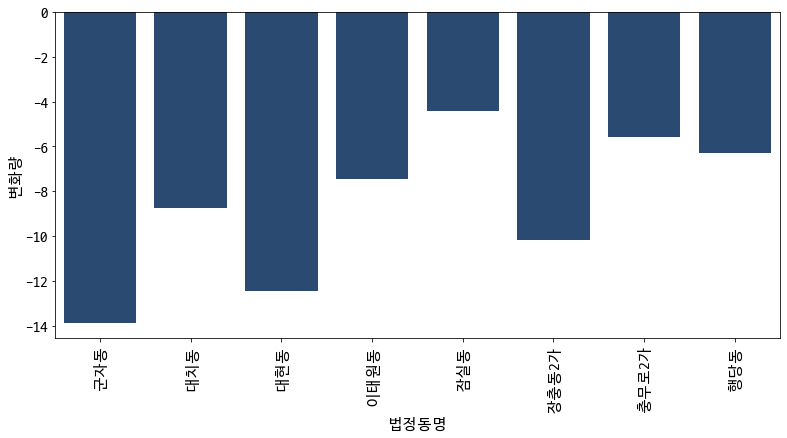

In [46]:
plt.figure(figsize=(13,6))
plt.xticks(rotation=90)

sns.barplot(x="법정동명", y="변화량", data=df_g.reset_index(),color="#1F497D")